In [1]:
import numpy as np
import pandas as pd
import scanpy as sc
import matplotlib.pyplot as plt

%matplotlib inline

In [2]:
sc.settings.verbosity = 3           
sc.logging.print_header()
sc.settings.set_figure_params(dpi=80, facecolor='white')

C:\Users\ana_emb\anaconda3\envs\cpdb\lib\site-packages\tqdm\auto.py:21: TqdmWarning: IProgress not found. Please update jupyter and ipywidgets. See https://ipywidgets.readthedocs.io/en/stable/user_install.html
  from .autonotebook import tqdm as notebook_tqdm


scanpy==1.9.5 anndata==0.10.2 umap==0.5.4 numpy==1.25.2 scipy==1.11.3 pandas==2.1.1 scikit-learn==0.24.0 statsmodels==0.14.0 pynndescent==0.5.10


In [4]:
results_file = 'write/GSE167186_Analysis_1.h5ad'

In [3]:
adata = sc.read_h5ad('write/GSE167186_QC.h5ad')  

In [5]:
adata

# AnnData object with n_obs × n_vars = 56049 × 2724
#     obs: 'batch', 'n_genes', 'n_genes_by_counts', 'total_counts', 'total_counts_mt', 'pct_counts_mt', 'leiden'
#     var: 'gene_ids', 'feature_types', 'genome', 'n_cells', 'mt', 'n_cells_by_counts', 'mean_counts', 'pct_dropout_by_counts', 'total_counts', 'highly_variable', 'means', 'dispersions', 'dispersions_norm', 'mean', 'std'
#     uns: 'hvg', 'leiden', 'log1p', 'neighbors', 'pca', 'rank_genes_groups', 'umap'
#     obsm: 'X_pca', 'X_umap'
#     varm: 'PCs'
#     obsp: 'connectivities', 'distances'

AnnData object with n_obs × n_vars = 56049 × 2724
    obs: 'batch', 'n_genes', 'n_genes_by_counts', 'total_counts', 'total_counts_mt', 'pct_counts_mt', 'leiden'
    var: 'gene_ids', 'feature_types', 'genome', 'n_cells', 'mt', 'n_cells_by_counts', 'mean_counts', 'pct_dropout_by_counts', 'total_counts', 'highly_variable', 'means', 'dispersions', 'dispersions_norm', 'mean', 'std'
    uns: 'hvg', 'leiden', 'log1p', 'neighbors', 'pca', 'rank_genes_groups', 'umap'
    obsm: 'X_pca', 'X_umap'
    varm: 'PCs'
    obsp: 'connectivities', 'distances'

/home/anaemb/miniconda3/lib/python3.11/site-packages/scanpy/plotting/_tools/scatterplots.py:1207: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if not is_categorical_dtype(values):
/home/anaemb/miniconda3/lib/python3.11/site-packages/scanpy/plotting/_tools/scatterplots.py:1216: FutureWarning: The default value of 'ignore' for the `na_action` parameter in pandas.Categorical.map is deprecated and will be changed to 'None' in a future version. Please set na_action to the desired value to avoid seeing this warning
  color_vector = pd.Categorical(values.map(color_map))
/home/anaemb/miniconda3/lib/python3.11/site-packages/scanpy/plotting/_tools/scatterplots.py:391: UserWarning: No data for colormapping provided via 'c'. Parameters 'cmap' will be ignored
  cax = scatter(


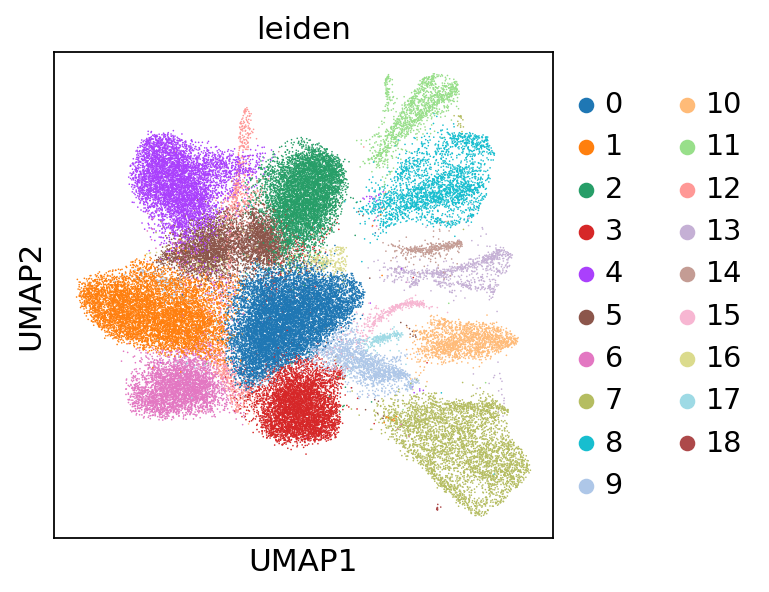

In [6]:
sc.pl.umap(adata, color='leiden')

In [7]:
# cluster 0  MYH1    IIX
# cluster 1  MYH7    I
# cluster 2  MYH2    IIA
# cluster 3  MYH2    IIA
# cluster 4  MYH7    I
# cluster 5  LGR5    Myogenic Progenitor Cell (MPC) PMID: 33357435
# cluster 6  LGR5    MPC
# cluster 7  COL6A1  Fibro
# cluster 8  ITGA1   Immun
# cluster 9  MYH1    IIX
# cluster 10 PAX7    Stem
# cluster 11 COL5A3  Fibro
# cluster 12 MT-CO1  Dead
# cluster 13 ZEB2    Immun
# cluster 14 ZAP70   Immun
# cluster 15 COL22A1 Fibro
# cluster 16 MYH1    IIX
# cluster 17 ACTC1   Smooth Muscle (SMC)    
# cluster 18 LRP1    SMC

In [6]:
annotation_list = {
    '0':'IIX_1',    
    '1':'I_1',
    '2':'IIA_1',
    '3':'IIA_2',
    '4':'I_2',
    '5':'MPC_1',
    '6':'MPC_2',
    '7':'Fibro_1',
    '8':'Immun_1',
    '9':'IIX_2',
    '10':'Stem',
    '11':'Fibro_2',
    '12':'Dead',
    '13':'Immun_2',
    '14':'Immun_3',
    '15':'Fibro_3',
    '16':'IIX_3',
    '17':'SMC_1',
    '18':'SMC_2'
}

In [7]:
adata.obs['cell_type'] = [annotation_list[clust] for clust in adata.obs['leiden']]

C:\Users\ana_emb\AppData\Roaming\Python\Python39\site-packages\scanpy\plotting\_tools\scatterplots.py:1207: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if not is_categorical_dtype(values):
C:\Users\ana_emb\AppData\Roaming\Python\Python39\site-packages\scanpy\plotting\_tools\scatterplots.py:1216: FutureWarning: The default value of 'ignore' for the `na_action` parameter in pandas.Categorical.map is deprecated and will be changed to 'None' in a future version. Please set na_action to the desired value to avoid seeing this warning
  color_vector = pd.Categorical(values.map(color_map))
C:\Users\ana_emb\AppData\Roaming\Python\Python39\site-packages\scanpy\plotting\_tools\scatterplots.py:391: UserWarning: No data for colormapping provided via 'c'. Parameters 'cmap' will be ignored
  cax = scatter(


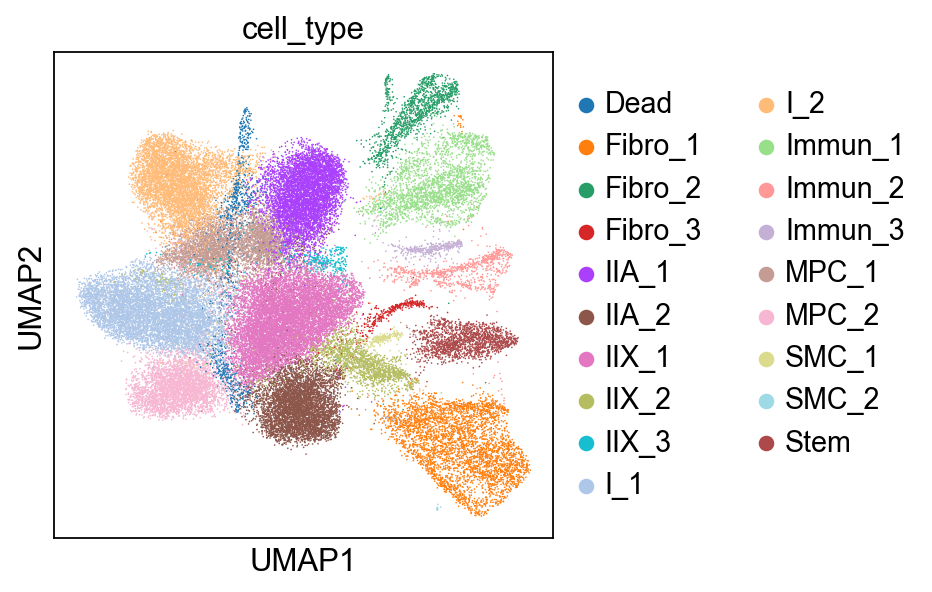

In [8]:
sc.pl.umap(adata, color = 'cell_type')

/home/anaemb/miniconda3/lib/python3.11/site-packages/scanpy/plotting/_tools/scatterplots.py:1207: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if not is_categorical_dtype(values):
/home/anaemb/miniconda3/lib/python3.11/site-packages/scanpy/plotting/_tools/scatterplots.py:1216: FutureWarning: The default value of 'ignore' for the `na_action` parameter in pandas.Categorical.map is deprecated and will be changed to 'None' in a future version. Please set na_action to the desired value to avoid seeing this warning
  color_vector = pd.Categorical(values.map(color_map))
/home/anaemb/miniconda3/lib/python3.11/site-packages/scanpy/plotting/_tools/scatterplots.py:391: UserWarning: No data for colormapping provided via 'c'. Parameters 'cmap' will be ignored
  cax = scatter(


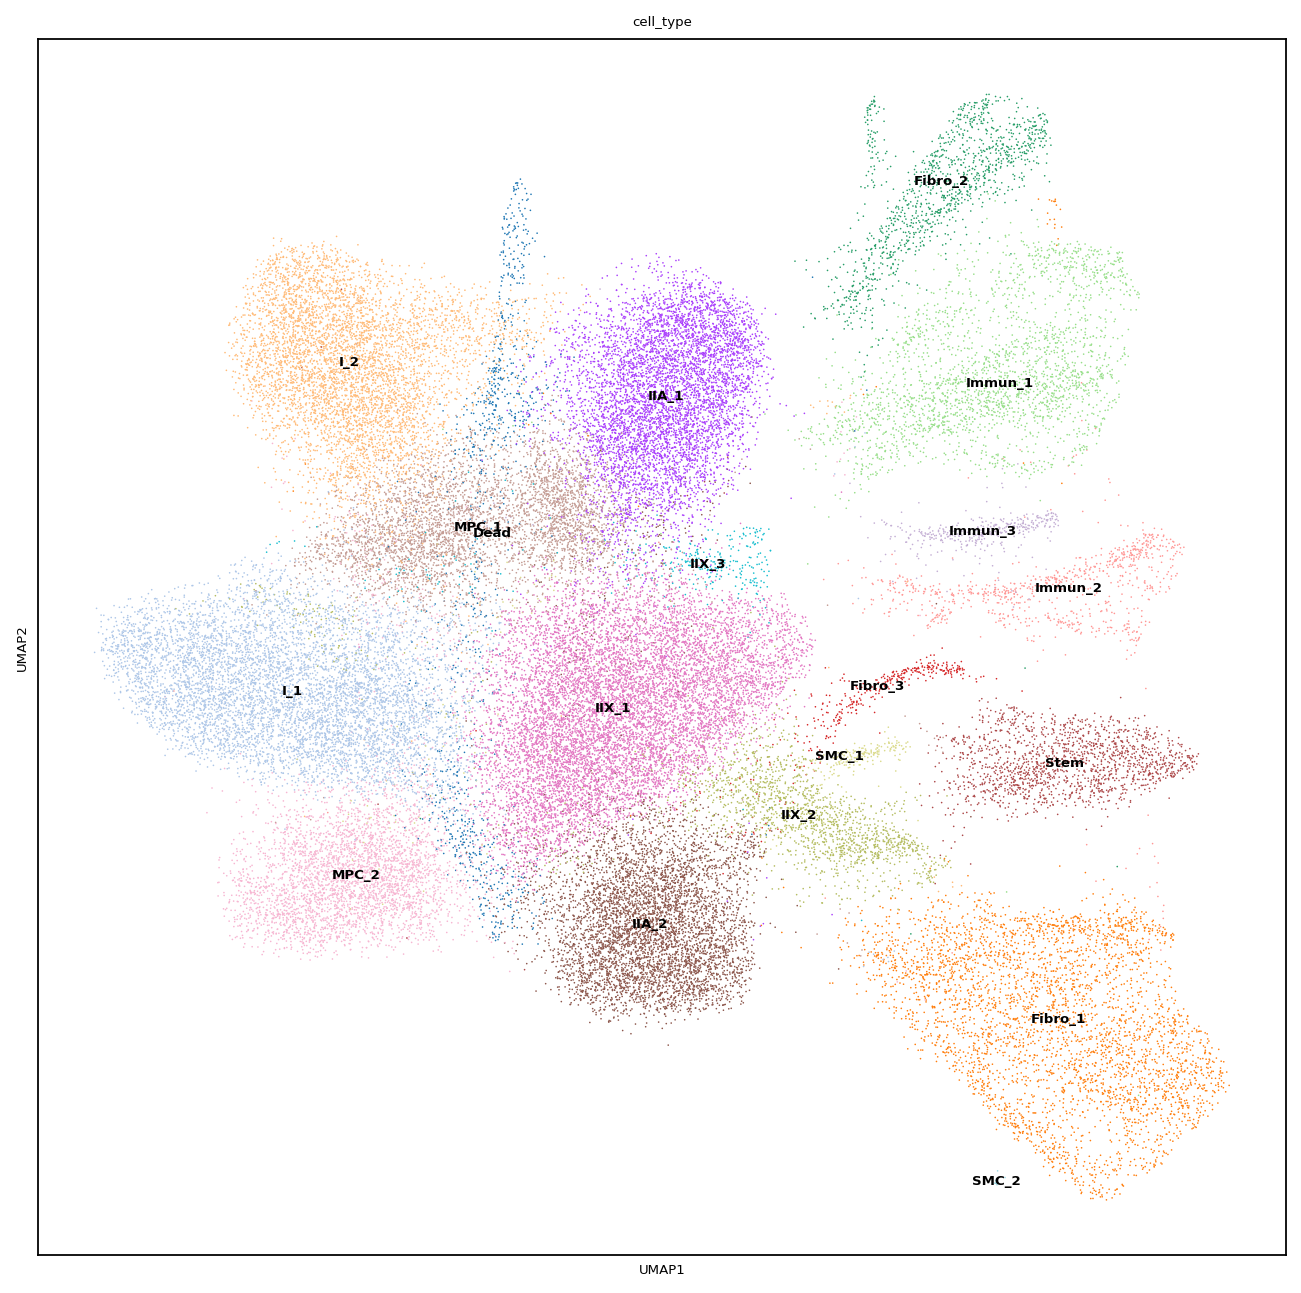

In [18]:
sc.pl.umap(adata, color = 'cell_type', legend_loc = 'on data')

In [12]:
adata

# AnnData object with n_obs × n_vars = 56049 × 2724
#     obs: 'batch', 'n_genes', 'n_genes_by_counts', 'total_counts', 'total_counts_mt', 'pct_counts_mt', 'leiden', 'cell_type'
#     var: 'gene_ids', 'feature_types', 'genome', 'n_cells', 'mt', 'n_cells_by_counts', 'mean_counts', 'pct_dropout_by_counts', 'total_counts', 'highly_variable', 'means', 'dispersions', 'dispersions_norm', 'mean', 'std'
#     uns: 'hvg', 'leiden', 'log1p', 'neighbors', 'pca', 'rank_genes_groups', 'umap', 'leiden_colors', 'cell_type_colors'
#     obsm: 'X_pca', 'X_umap'
#     varm: 'PCs'
#     obsp: 'connectivities', 'distances'

AnnData object with n_obs × n_vars = 56049 × 2724
    obs: 'batch', 'n_genes', 'n_genes_by_counts', 'total_counts', 'total_counts_mt', 'pct_counts_mt', 'leiden', 'cell_type'
    var: 'gene_ids', 'feature_types', 'genome', 'n_cells', 'mt', 'n_cells_by_counts', 'mean_counts', 'pct_dropout_by_counts', 'total_counts', 'highly_variable', 'means', 'dispersions', 'dispersions_norm', 'mean', 'std'
    uns: 'hvg', 'leiden', 'log1p', 'neighbors', 'pca', 'rank_genes_groups', 'umap', 'leiden_colors', 'cell_type_colors'
    obsm: 'X_pca', 'X_umap'
    varm: 'PCs'
    obsp: 'connectivities', 'distances'

In [80]:
adata.write(results_file)

In [10]:
adata.obs.to_csv("MetaFile_ori.csv")

In [9]:
adata = sc.read_h5ad('write/GSE167186_Analysis_1.h5ad')  

In [16]:
import sys
sys.executable

'/home/anaemb/miniconda3/bin/python'

In [79]:
from cellphonedb.src.core.methods import cpdb_degs_analysis_method

deconvoluted, means, relevant_interactions, significant_means = cpdb_degs_analysis_method.call(
         cpdb_file_path = 'cellphonedb.zip',
         meta_file_path = 'MetaFile_ori.csv',
         counts_file_path = 'write/GSE167186_QC.h5ad',
         degs_file_path = 'DEG.csv',
         counts_data = 'hgnc_symbol',
         output_path = 'outpath/')

[ ][CORE][18/10/23-11:02:10][INFO] [Cluster DEGs Analysis] Threshold:0.1 Precision:3
[ ][CORE][18/10/23-11:02:10][WARNING] 
***********************************
DEGs ANALYSIS IS AN EXPERIMENTAL METHOD STILL UNDER DEVELOPMENT!
***********************************
Reading user files...
The following user files were loaded successfully:
write/GSE167186_QC.h5ad
MetaFile_ori.csv
DEG.csv


NoInteractionsFound: No CellPhoneDB interacions found in this input.

In [73]:
adata

AnnData object with n_obs × n_vars = 56049 × 2724
    obs: 'batch', 'n_genes', 'n_genes_by_counts', 'total_counts', 'total_counts_mt', 'pct_counts_mt', 'leiden', 'cell_type'
    var: 'gene_ids', 'feature_types', 'genome', 'n_cells', 'mt', 'n_cells_by_counts', 'mean_counts', 'pct_dropout_by_counts', 'total_counts', 'highly_variable', 'means', 'dispersions', 'dispersions_norm', 'mean', 'std'
    uns: 'cell_type_colors', 'hvg', 'leiden', 'leiden_colors', 'log1p', 'neighbors', 'pca', 'rank_genes_groups', 'umap', 'rank_genes_groups_filtered', 'wilcoxon'
    obsm: 'X_pca', 'X_umap'
    varm: 'PCs'
    obsp: 'connectivities', 'distances'

In [10]:
sc.tl.rank_genes_groups(adata, 'cell_type', method='wilcoxon', key_added = "wilcoxon")

ranking genes


C:\Users\ana_emb\anaconda3\envs\cpdb\lib\site-packages\numpy\core\fromnumeric.py:86: FutureWarning: The behavior of DataFrame.sum with axis=None is deprecated, in a future version this will reduce over both axes and return a scalar. To retain the old behavior, pass axis=0 (or do not pass axis)
  return reduction(axis=axis, out=out, **passkwargs)


    finished: added to `.uns['wilcoxon']`
    'names', sorted np.recarray to be indexed by group ids
    'scores', sorted np.recarray to be indexed by group ids
    'logfoldchanges', sorted np.recarray to be indexed by group ids
    'pvals', sorted np.recarray to be indexed by group ids
    'pvals_adj', sorted np.recarray to be indexed by group ids (0:01:32)


In [11]:
DEG_Dead = (sc.get.rank_genes_groups_df(adata, group="Dead", key = "wilcoxon")
          .set_index("names", drop=False))

In [12]:
DEG_Dead.head()

,names,scores,logfoldchanges,pvals,pvals_adj
names,,,,,
MT-CO1,MT-CO1,47.123985,3.118242,0.0,0.0
ACTA1,ACTA1,45.402706,2.128199,0.0,0.0
CKM,CKM,43.100636,2.754110,0.0,0.0
TPM2,TPM2,42.000198,1.963516,0.0,0.0
MT-CO2,MT-CO2,41.845795,3.361065,0.0,0.0


In [13]:
DEG_Dead.to_csv('DEG_Dead.csv', sep=',', index = False)

In [14]:
DEG_Fibro_1 = (sc.get.rank_genes_groups_df(adata, group="Fibro_1", key = "wilcoxon")
          .set_index("names", drop=False))

DEG_Fibro_1.to_csv('DEG_Fibro_1.csv', sep=',', index = False)

In [15]:
DEG_Fibro_2 = (sc.get.rank_genes_groups_df(adata, group="Fibro_2", key = "wilcoxon")
          .set_index("names", drop=False))

DEG_Fibro_2.to_csv('DEG_Fibro_2.csv', sep=',', index = False)

In [16]:
DEG_Fibro_3 = (sc.get.rank_genes_groups_df(adata, group="Fibro_3", key = "wilcoxon")
          .set_index("names", drop=False))

DEG_Fibro_3.to_csv('DEG_Fibro_3.csv', sep=',', index = False)

In [17]:
DEG_IIA_1 = (sc.get.rank_genes_groups_df(adata, group="IIA_1", key = "wilcoxon")
          .set_index("names", drop=False))

DEG_IIA_1.to_csv('DEG_IIA_1.csv', sep=',', index = False)

In [18]:
DEG_IIA_2 = (sc.get.rank_genes_groups_df(adata, group="IIA_2", key = "wilcoxon")
          .set_index("names", drop=False))

DEG_IIA_2.to_csv('DEG_IIA_2.csv', sep=',', index = False)

In [19]:
DEG_IIX_1 = (sc.get.rank_genes_groups_df(adata, group="IIX_1", key = "wilcoxon")
          .set_index("names", drop=False))

DEG_IIX_1.to_csv('DEG_IIX_1.csv', sep=',', index = False)

In [20]:
DEG_IIX_2 = (sc.get.rank_genes_groups_df(adata, group="IIX_2", key = "wilcoxon")
          .set_index("names", drop=False))

DEG_IIX_2.to_csv('DEG_IIX_2.csv', sep=',', index = False)

In [21]:
DEG_IIX_3 = (sc.get.rank_genes_groups_df(adata, group="IIX_3", key = "wilcoxon")
          .set_index("names", drop=False))

DEG_IIX_3.to_csv('DEG_IIX_3.csv', sep=',', index = False)

In [22]:
DEG_I_1 = (sc.get.rank_genes_groups_df(adata, group="I_1", key = "wilcoxon")
          .set_index("names", drop=False))

DEG_I_1.to_csv('DEG_I_1.csv', sep=',', index = False)

In [23]:
DEG_I_2 = (sc.get.rank_genes_groups_df(adata, group="I_2", key = "wilcoxon")
          .set_index("names", drop=False))

DEG_I_2.to_csv('DEG_I_2.csv', sep=',', index = False)

In [24]:
DEG_Immun_1 = (sc.get.rank_genes_groups_df(adata, group="Immun_1", key = "wilcoxon")
          .set_index("names", drop=False))

DEG_Immun_1.to_csv('DEG_Immun_1.csv', sep=',', index = False)

In [25]:
DEG_Immun_2 = (sc.get.rank_genes_groups_df(adata, group="Immun_2", key = "wilcoxon")
          .set_index("names", drop=False))

DEG_Immun_2.to_csv('DEG_Immun_2.csv', sep=',', index = False)

In [26]:
DEG_Immun_3 = (sc.get.rank_genes_groups_df(adata, group="Immun_3", key = "wilcoxon")
          .set_index("names", drop=False))

DEG_Immun_3.to_csv('DEG_Immun_3.csv', sep=',', index = False)

In [27]:
DEG_MPC_1 = (sc.get.rank_genes_groups_df(adata, group="MPC_1", key = "wilcoxon")
          .set_index("names", drop=False))

DEG_MPC_1.to_csv('DEG_MPC_1.csv', sep=',', index = False)

In [28]:
DEG_MPC_2= (sc.get.rank_genes_groups_df(adata, group="MPC_2", key = "wilcoxon")
          .set_index("names", drop=False))

DEG_MPC_2.to_csv('DEG_MPC_2.csv', sep=',', index = False)

In [29]:
DEG_SMC_1 = (sc.get.rank_genes_groups_df(adata, group="SMC_1", key = "wilcoxon")
          .set_index("names", drop=False))

DEG_SMC_1.to_csv('DEG_SMC_1.csv', sep=',', index = False)

In [30]:
DEG_SMC_2 = (sc.get.rank_genes_groups_df(adata, group="SMC_2", key = "wilcoxon")
          .set_index("names", drop=False))

DEG_SMC_2.to_csv('DEG_SMC_2.csv', sep=',', index = False)

In [31]:
DEG_Stem = (sc.get.rank_genes_groups_df(adata, group="Stem", key = "wilcoxon")
          .set_index("names", drop=False))

DEG_Stem.to_csv('DEG_Stem.csv', sep=',', index = False)

In [58]:
import pandas as pd

DEG_Dead = pd.read_csv('DEG_Dead.csv', usecols=[0,1], header = 0)
print(DEG_Dead)

      cell_type       names
0          Dead      MT-CO1
1          Dead       ACTA1
2          Dead         CKM
3          Dead        TPM2
4          Dead      MT-CO2
...         ...         ...
23256      Dead      LUC7L3
23257      Dead  MIR133A1HG
23258      Dead       DDX17
23259      Dead       NEAT1
23260      Dead      MALAT1

[23261 rows x 2 columns]


In [59]:
DEG_Fibro_1 = pd.read_csv('DEG_Fibro_1.csv', usecols=[0,1], header = 0)

In [60]:
DEG_Fibro_2 = pd.read_csv('DEG_Fibro_2.csv', usecols=[0,1], header = 0)

In [61]:
DEG_Fibro_3 = pd.read_csv('DEG_Fibro_3.csv', usecols=[0,1], header = 0)

In [62]:
DEG_I_1 = pd.read_csv('DEG_I_1.csv', usecols=[0,1], header = 0)

In [63]:
DEG_I_2 = pd.read_csv('DEG_I_2.csv', usecols=[0,1], header = 0)

In [64]:
DEG_IIA_1 = pd.read_csv('DEG_IIA_1.csv', usecols=[0,1], header = 0)

In [65]:
DEG_IIA_2 = pd.read_csv('DEG_IIA_2.csv', usecols=[0,1], header = 0)

In [66]:
DEG_IIX_1 = pd.read_csv('DEG_IIX_1.csv', usecols=[0,1], header = 0)

In [67]:
DEG_IIX_2 = pd.read_csv('DEG_IIX_2.csv', usecols=[0,1], header = 0)

In [68]:
DEG_IIX_3 = pd.read_csv('DEG_IIX_3.csv', usecols=[0,1], header = 0)

In [69]:
DEG_Immun_1 = pd.read_csv('DEG_Immun_1.csv', usecols=[0,1], header = 0)

In [70]:
DEG_Immun_2 = pd.read_csv('DEG_Immun_2.csv', usecols=[0,1], header = 0)

In [71]:
DEG_Immun_3 = pd.read_csv('DEG_Immun_3.csv', usecols=[0,1], header = 0)

In [72]:
DEG_MPC_1 = pd.read_csv('DEG_MPC_1.csv', usecols=[0,1], header = 0)

In [73]:
DEG_MPC_2 = pd.read_csv('DEG_MPC_2.csv', usecols=[0,1], header = 0)

In [74]:
DEG_SMC_1 = pd.read_csv('DEG_SMC_1.csv', usecols=[0,1], header = 0)

In [75]:
DEG_SMC_2 = pd.read_csv('DEG_SMC_2.csv', usecols=[0,1], header = 0)

In [76]:
DEG_Stem = pd.read_csv('DEG_Stem.csv', usecols=[0,1], header = 0)

In [77]:
DEG = pd.concat([DEG_Dead, 
                 DEG_Fibro_1, DEG_Fibro_2, DEG_Fibro_3,
                 DEG_I_1, DEG_I_2, DEG_IIA_1, DEG_IIA_2, DEG_IIX_1, DEG_IIX_2, DEG_IIX_3,
                 DEG_Immun_1, DEG_Immun_2, DEG_Immun_3,
                 DEG_MPC_1, DEG_MPC_2, DEG_SMC_1, DEG_SMC_2, DEG_Stem], 
                 axis=0)
print(DEG)

      cell_type    names
0          Dead   MT-CO1
1          Dead    ACTA1
2          Dead      CKM
3          Dead     TPM2
4          Dead   MT-CO2
...         ...      ...
23256      Stem   MYBPC1
23257      Stem  PDE4DIP
23258      Stem    NEAT1
23259      Stem      NEB
23260      Stem      TTN

[441959 rows x 2 columns]


In [78]:
DEG.to_csv('DEG.csv', sep=',', index = False)